# Exploring behavior of a membrane-protein system in  MD simulations:

     1.  membrane/protein/water atom density distribution along z axis (perpendicular to the membrane surface)
     2.  area per lipid 
     

### Author: Daria Kokh
    v.1.0
    Copyright (c) 2019
    Released under the GNU Public Licence, v2 or any higher version
    


### Input data required:
    trajectory file 
    pdb file (for example, generated from the first frame)
    
    
### Packages required:
    numpy
    matplotlib
    MDAnalysis
    scipy
    code is written on Python 3.x

#  Application example 
    Membrane containing cholesterol 50%  + POPC + POPE and M2 muscarinic receptor (PDB ID=4MQT)


##  1.  Reading a trajectory and making analysis
### input parameters
        Mem.ref_pdb  - reference pdb file (for example, the first frame)
        Mem.sel_ligands  - ligand residue name
        Mem.interval - frames of the trajectory to be processed (first, last, stirde)
        Mem.dz  - grid interval (default- 3A )
        Mem.sel_m - selection amsk for lipids (default- "(not type H ) and ( resname CHL PC PA PE )")



In [1]:
from Scripts.Membrane_analysis import *
# define reference PDB file and trajectory file
ref =  "Data/4MQT/ORTO-CHL-lipid14/AMBER_eq/ORTO-CHL-prod8-NPT.pdb"
traj = "Data/4MQT/ORTO-CHL-lipid14/NAMD_eq/Replica1/ORT-CHL_repl.dcd"

#--- generate Membrane_properties object 
#--- ligand will be treated together with the protein; ligand residue name is "IXO"
#--- all trajectory starting from the frame 200 and with the step 50 will be analyzed
#--- analysis will be done on a grid with a grid step 
#---  d=6 Angstrom over x/y and dh = 3 Angstrom over z 
#--- membrane residue names are "CHL PC PA PE"; 
#--- Note that "OL" is not included because in the AMBER ff POPC/POPE lipids are splitted into 3 parts: 
#--- PC/PE (head of the lipid) and OL & PA - two chains of fatty acids, 
#--- only one fatty acid chain must be included to avoid double counting of residues!


Mem = Membrane_properties(ref,sel_ligands = " IXO ",interval=(200,-1,100),sel_m =  ["CHL", "PC", "PA", "PE"])
#-- generate data for each frame 
Mem.Get_info(traj)
#-- average data averaged over frames
Mem.Prep4plot()


DIM (from traj):  [ 90.26654  94.65103 137.8038   90.       90.       90.     ]
DIM (x/y/z):  32 33 48
number of frames= 1418; file size 1934 M
will be analyzed  12 frames
frames analized:  0  current frame:  200
frames analized:  10  current frame:  1200


##  2.  Summary- visualization

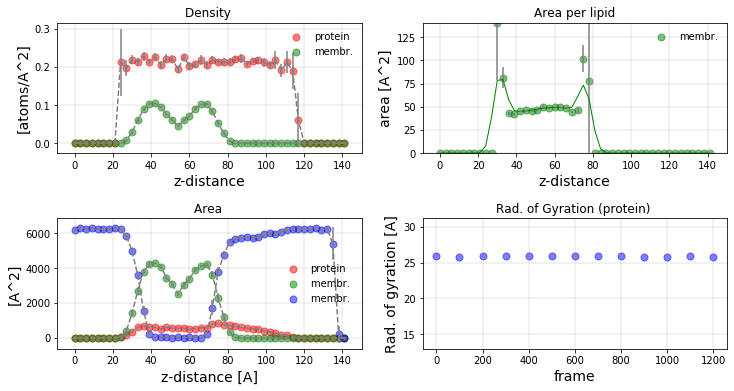

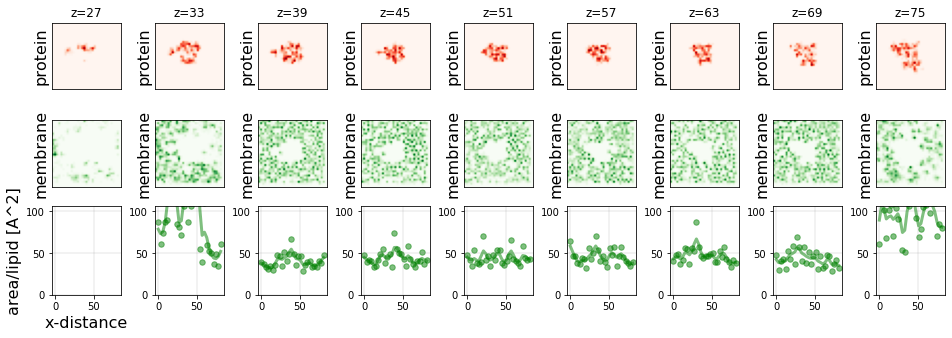

In [2]:
import warnings
warnings.filterwarnings("ignore") 
# plot the variation of membrane parameters over z
Mem.Plot_mem_prot_wat_dens()
# plot membrane and protein destribution for several z values
Mem.Plot_mem_z()
#Mem.Check()

##  3.  Examples of  result vizualization

        
### per-frame data:

##### arrays of numpy 3D matrices: [frame][z, x, y] 
        Mem.mem_slab  -  atom dencity for the membrane 
        Mem.prot_slab  -  atom dencity for the protein
        Mem.wat_slab  -  atom dencity water
        
##### arrays of vectors: [frame][z] 
        Mem.prot_area - area of the protein in the xy plane
        Mem.mem_area - area of the membrane in the xy plane
        Mem.wat_area - area of water molecules in the xy plane
        Mem.resid_array - 
        Mem.dens_p  - density of lipid atoms  in the x/y plane
        Mem.dens_w  - density of water  atoms  in the x/y plane
        Mem.dens_m   - density of lipid atoms  in the x/y plane
        Mem.dens_m_r - area per lipid in the x/y plane
        
##### arrays of arrays: [frame][z][x]  
        Mem.resid_array_zx - area per lipid as a function of z and x
        
##### vector [frame]
        Mem.Rgr - protein radius of gyration 
        
### data averaged over frames

##### array of numpy matrices [zi][x,y], where zi - includes only z value withing a membrane region (see parameters start_mem,stop.mem, and step.mem)
        Mem.mem_slab_frame 
        Mem.prot_slab_frame 
##### array of numpy matrices [zi][x], where zi - includes only  membrane region
        Mem.mem_slab_frame_zx 
        Mem.area_x 
        
##### position of the membrain in the box;  used for plotting
        Mem.start_mem, Mem.stop_mem Mem.step_mem - parameters used to visuslize membrane along z 
        Mem.nx, Mem.ny,  Mem.nz - dimentions of the simulation box        


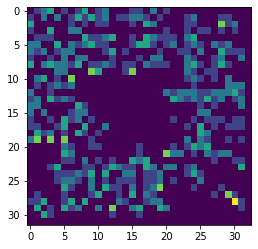

In [3]:
# plot lipid atom distribution in xy plane;  frame 0 and at the middel of the box (over z)
plt.imshow(Mem.mem_slab[0][int(Mem.nz/2)])

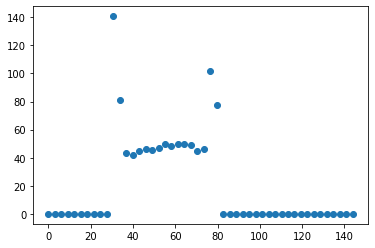

In [4]:
# plot averaged (over all frames) area per lipid as a function of z 
plt.scatter(x= Mem.dz*np.linspace(0,np.mean(Mem.dens_m_r,axis=0).shape[0],np.mean(Mem.dens_m_r,axis=0).shape[0]),y=np.mean(Mem.dens_m_r,axis=0))
